# 无监督学习

## 数据准备

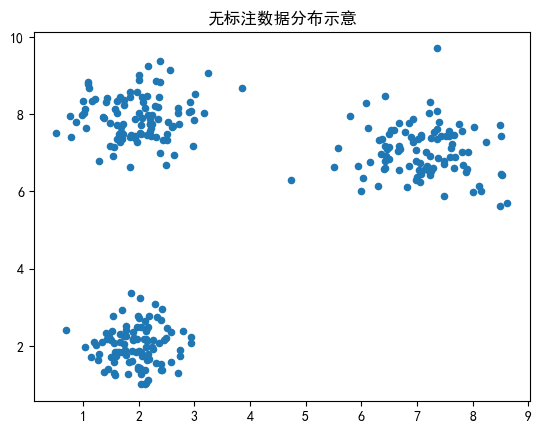

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负


np.random.seed(42)
n_samples = 100

group1 = np.random.normal(loc=[2, 2], scale=0.5, size=(n_samples, 2))
group2 = np.random.normal(loc=[7, 7], scale=0.7, size=(n_samples, 2))
group3 = np.random.normal(loc=[2, 8], scale=0.6, size=(n_samples, 2))

X = np.vstack([group1, group2, group3])
df = pd.DataFrame(X, columns=['x', 'y'])


# 可视化
plt.scatter(df['x'], df['y'], s=20)
plt.title("无标注数据分布示意")
plt.show()

## <mark>1、K-means</mark> K-均值算法

缺点：
随机选择的初始聚类中心，结果可能缺乏一致性

In [ ]:
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)

centers = KM.cluster_centers_

print(centers)


# 可视化
plt.scatter(df['x'], df['y'], s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=50, c='r', marker='^')
plt.title("无标注数据分布示意")
plt.show()


output cluster result:

In [1]:
cluster_result = KM.predict(X)

NameError: name 'KM' is not defined

## 2、Meanshift
实现过程

    在中心点一定区域检索数据点，按照密度梯度上升移动聚类的中心点
    更新数据
    重复流程到中心点稳定

特点：

    自动发现类别数量，不要认为给定分类数量
    需要给定分类的半径



In [4]:
from sklearn.cluster import MeanShift,estimate_bandwidth

#detect bandwidth

bandwidth = estimate_bandwidth(X,n_samples = 300)

ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)
centers = ms.cluster_centers_
print(centers)

predict_centre = ms.predict(X)

print(predict_centre[0:5])

[[1.94221787 2.01701116]
 [1.94095897 7.90508867]
 [7.08096229 7.03893585]]
[0 0 0 0 0]


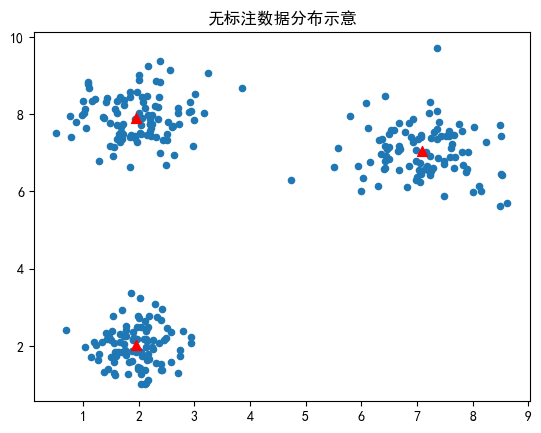

In [140]:
plt.scatter(df['x'], df['y'], s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=50, c='r', marker='^')
plt.title("无标注数据分布示意")
plt.show()



## 3、<mark>KNN</mark> 聚类算法(K Nearest Neighbor)
KNN属于<mark>监督式</mark>机器学习的方法

过程:

    首先需要有一个给定的训练数据集
    对于新输入的数据实例，在训练数据集中找到和该实例最近邻的K个实例，
    然后取这个K个实例中，多数属于的分类，将该新数据也划分到到该分类中
特征：

    是简单的学习算法之一






In [3]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,predict_centre)  # predict_centre为使用K_Means计算出来的中心，在这里相当于数据标签
# a = pd.DataFrame([5,5]).T

result_cluster = KNN.predict(pd.DataFrame([5,5]).T) # 转置之后才是 1行2列 的数据，或者使用KNN.predict(pd.array([5,5]))

print(result_cluster)

NameError: name 'predict_centre' is not defined

### KNN 进行有分类边界的绘制
分类边界 分类色块 涂色 区域 决策边界

In [17]:
import plotly.graph_objects as go

# 定义网格边界（稍微扩展数据范围以更好地显示边界）
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 创建网格点
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 预测网格点的类别
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = go.Figure()

# 添加决策边界背景（使用等高线图）
fig.add_trace(go.Contour(
    x=np.arange(x_min, x_max, 0.02),
    y=np.arange(y_min, y_max, 0.02),
    z=Z,
    showscale=False,
    opacity=0.4,
    colorscale='Viridis'  # 可根据类别数调整颜色映射
))

# 添加原始数据点
fig.add_trace(go.Scatter(
    x=X[:, 0],
    y=X[:, 1],
    mode='markers',
    marker=dict(
        color=y,
        colorscale='Viridis',
        showscale=False
    ),
    showlegend=False
))

# 更新布局
fig.update_layout(
    title='KNN Decision Boundary',
    xaxis_title='Feature 1',
    yaxis_title='Feature 2'
)

# 显示图形
fig.show()

## 4、<mark>异常检测</mark>(Error Detection)

In [8]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

clf = EllipticEnvelope(contamination=0.1)
result_clf = clf.fit(X[:50,:])
print(result_clf.raw_support_)

[ True  True  True  True  True False  True  True  True  True  True  True
  True False False False False  True False  True False False False False
 False False False  True  True  True  True False False False  True  True
  True False  True  True  True False  True False False False False  True
  True  True]


# 5、 主成分分析（PCA） 降维
先进行<mark>标准化</mark>处理
## 先绘制原始的的数据分布，以进行比较

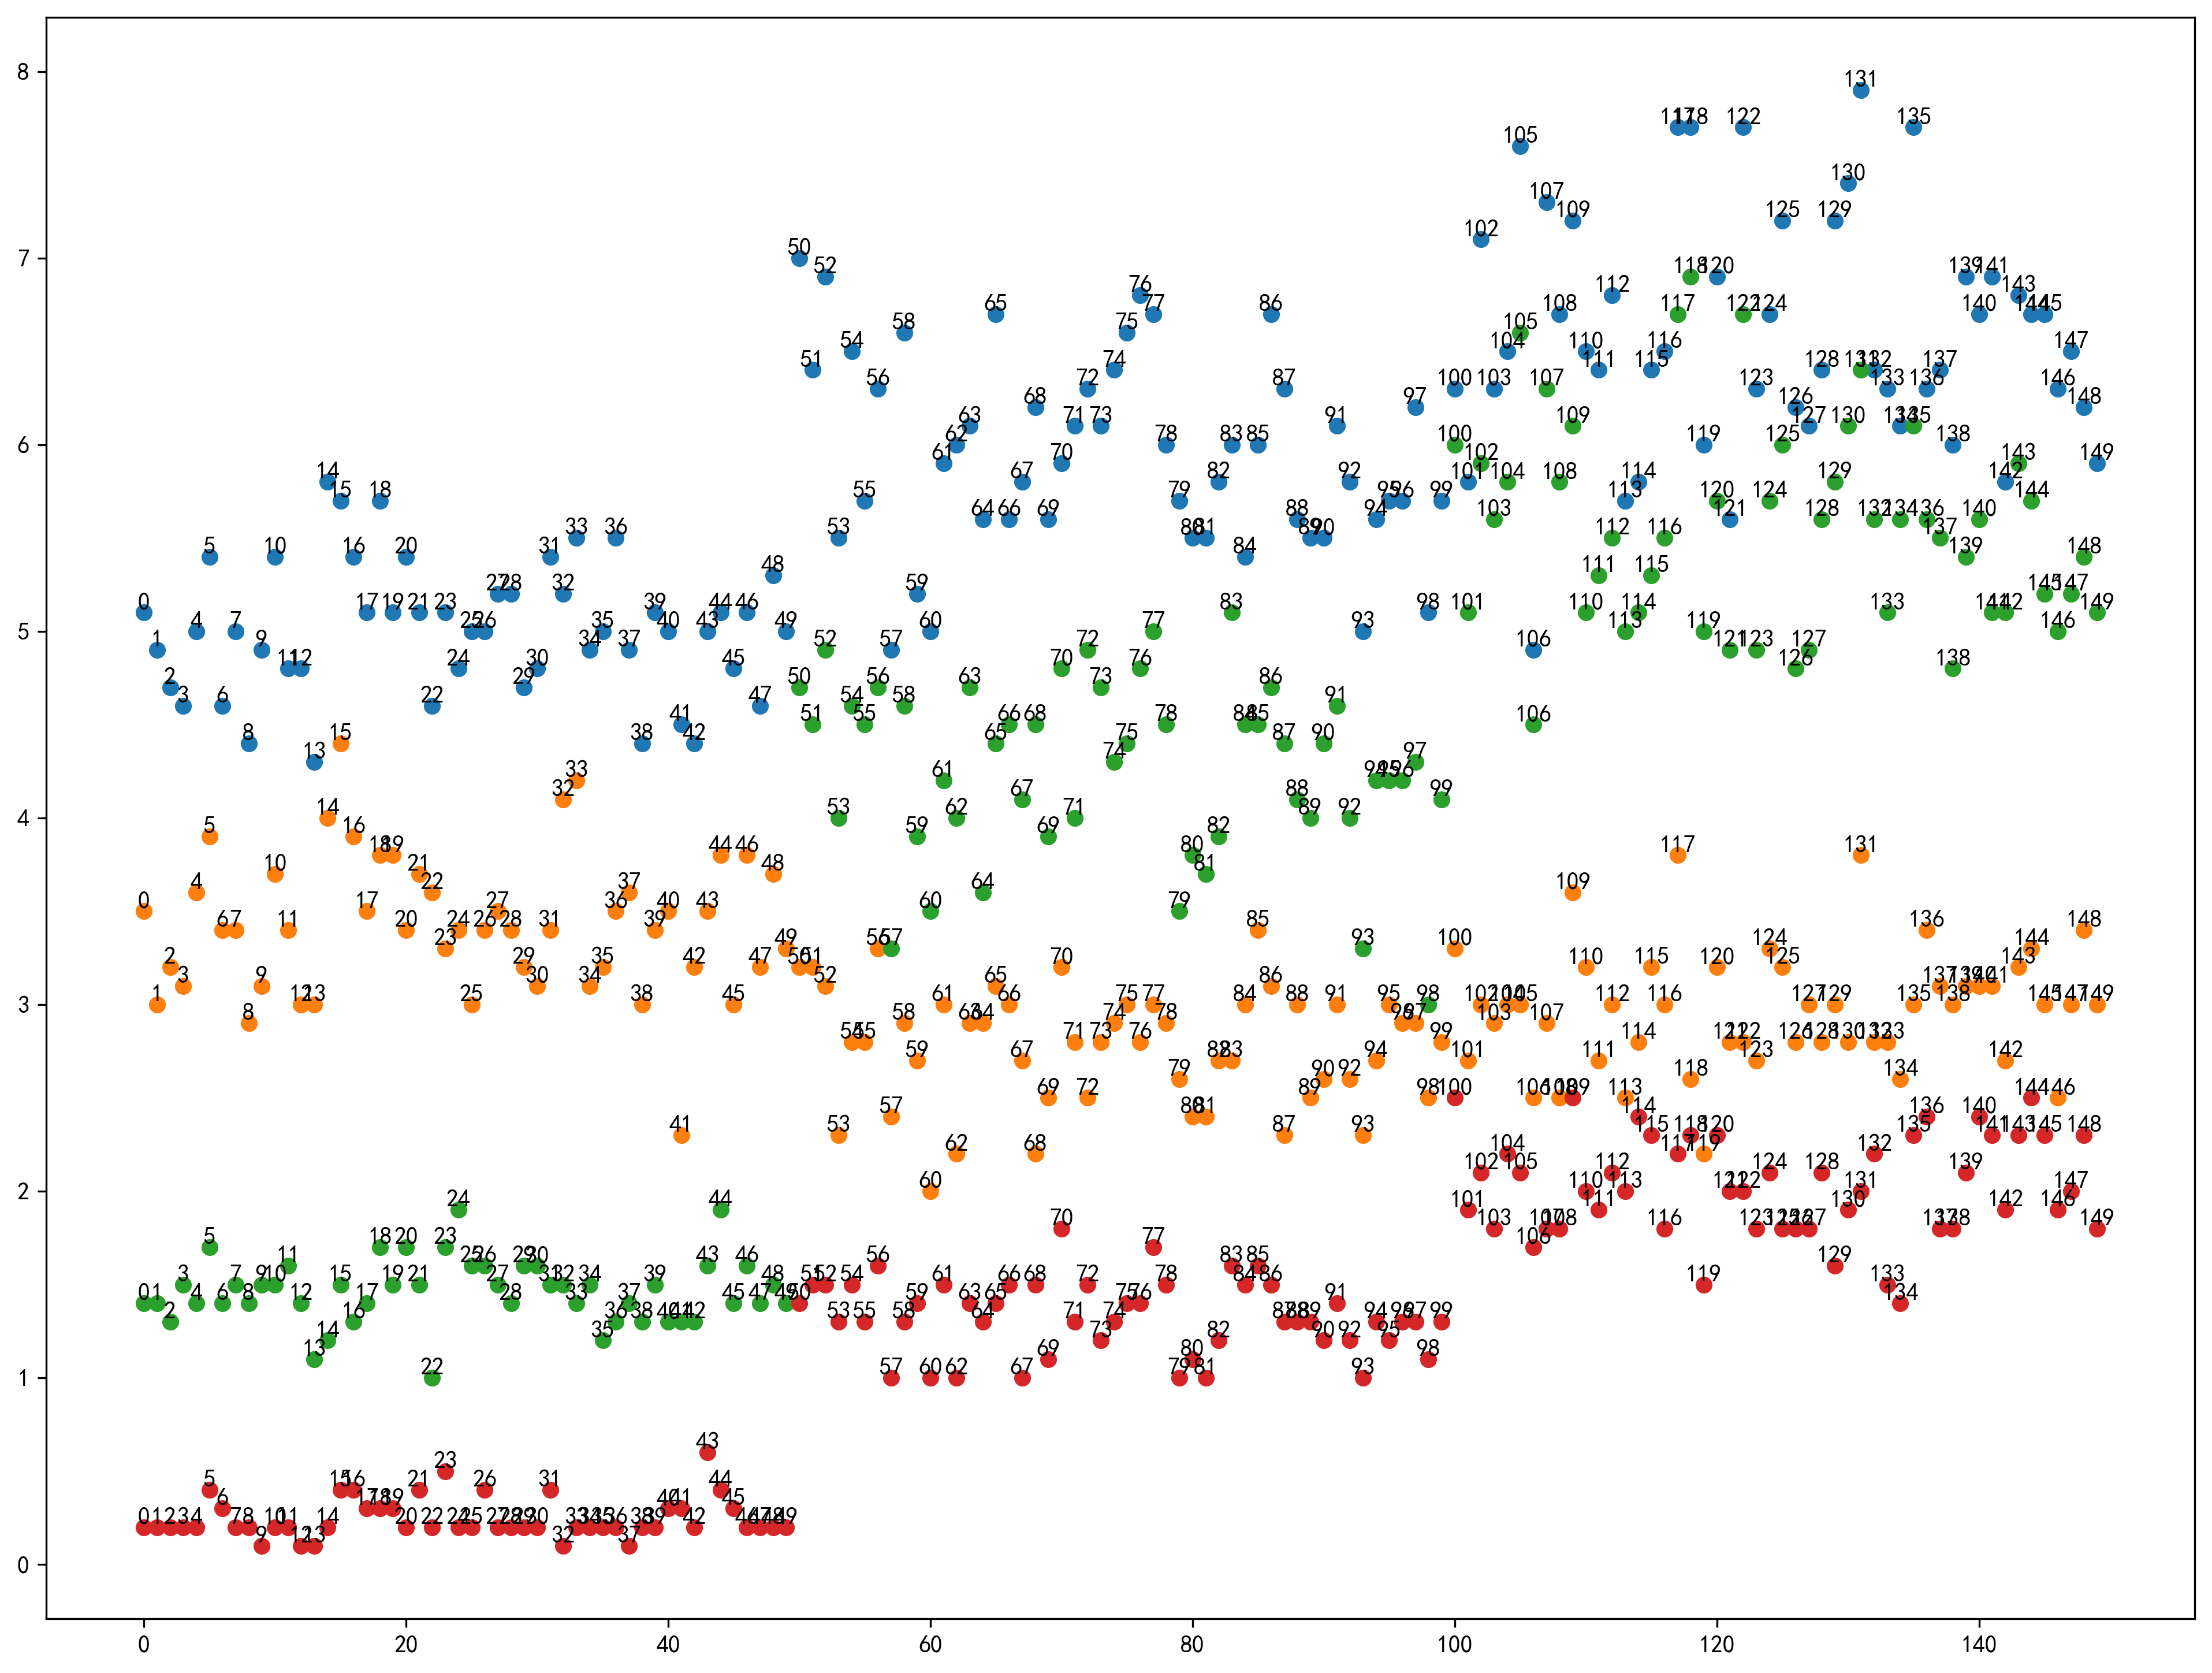

In [82]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import plotly.express as px

X_std = StandardScaler().fit_transform(X)

plt.figure(figsize=(16, 12), dpi=300)

for i in range(4):

    plt.scatter(pd.DataFrame(range(150)),X[:,i])
    for j in range(150): # 绘制数据点
        plt.text(j, X[j,i], str(j), fontsize=10, color='black', ha='center', va='bottom')


plt.show()


## 进行归一化，平移，使得最终的数据分布更接近正态分布 均值为0，方差为1
### 绘制格式化后的数据分布

##最后的结论是：发现这个鸢尾花的品类和后两个数据的相关度很高，完全可以用后两个数据来区分，而不是降维，但是这场另外的话题

In [ ]:

plt.figure()  # 创建新的画布
for i in range(4):

    plt.scatter(pd.DataFrame(range(150)),X_std[:,i])
plt.show()


### 其实按照实际意义应该绘制前两列为一组图像，后两组为一组图像，

In [80]:
X_std= X_pca

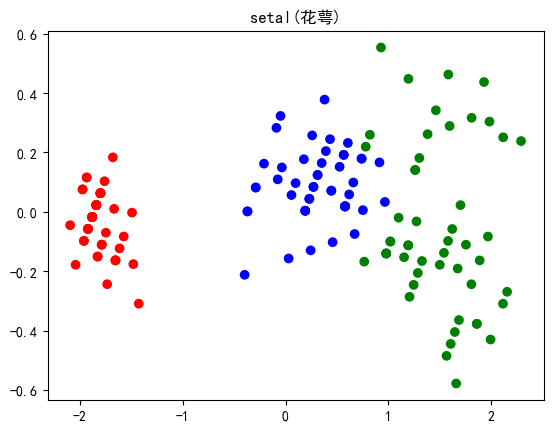

In [81]:

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负


plt.figure()  # 创建新的画布
colors = ['red'] * 50 + ['blue'] * 50 + ['green'] * 50
# 使用颜色列表绘制所有数据点
plt.scatter(X_std[:,0], X_std[:,1], c=colors,)
plt.title("setal(花萼)")
plt.show()

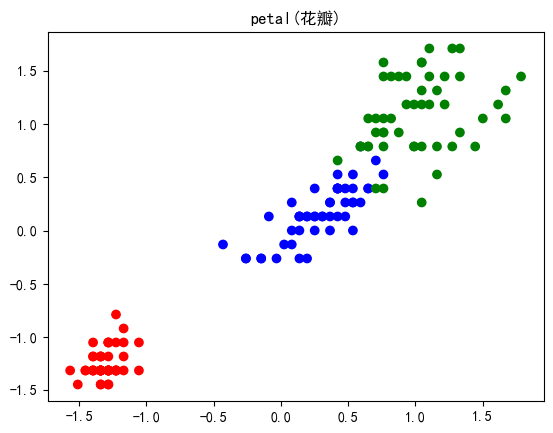

In [83]:

plt.figure()  # 创建新的画布
plt.scatter(X_std[:,2],X_std[:,3],c=colors,)
plt.title("petal(花瓣)")
plt.show()


## 这是使用平行坐标图来进行可视化，来可视化的描述三维以上的数据据之间的关系

In [24]:
import plotly.express as px
from sklearn.datasets import load_iris

from sklearn.datasets import load_iris
# 其中数据从左到右四列分别是：样本编号，Sepal Length，Sepal Width，Petal Length，Petal Width   selat：花萼 petal：花瓣
iris = load_iris()
X, y = iris.data, iris.target

fig = px.parallel_coordinates(np.concatenate([np.arange(1,151).reshape(-1,1), X],axis = 1),
                              color_continuous_scale=px.colors.sequential.Viridis, # 可以选择不同的颜色方案
                              title="四维数据平行坐标图 (150 行)",
                              labels={"Feature_A": "特性 A", "Feature_B": "特性 B",
                                      "Feature_C": "特性 C", "Feature_D": "特性 D"},
                              # color="Feature_A" # 也可以用某一列的值来着色，例如，根据Feature_A的值来着色
                             )

fig.show()

## 使用三维图，加第四位纬度用颜色来进进行区分，效果并不好

In [6]:
import numpy as np
import plotly.express as px
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt



X, y = load_iris(return_X_y= True)

fig = px.scatter_3d(y=X[:50, 0], color=X[:50, 1], z=X[:50, 2], x=X[:50,3], color_continuous_scale='Viridis')
fig.show()

print(X.shape)

(150, 4)


## 使用<mark>PCA</mark>进行降维
无监督降维

首先获取个特征的<mark>解释方差大小</mark>，来确定PCA最终需要降低的维度

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std = StandardScaler()

X_std = std.fit_transform(X)

pca = PCA(n_components=None)
pca.fit(X) #

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

X_pca4 = pca.transform(X)

# X_pca = pca.fit_transform(X_std)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std[:,2:])



## 其他的无监督降维
## UMAP （Uniform Manifold Approximation and Projection 非线性降维

C:\Users\38473\.conda\envs\ML_learn_310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\38473\.conda\envs\ML_learn_310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


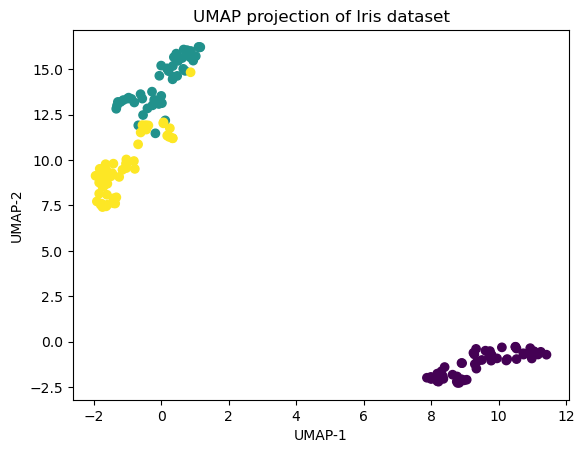

In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from umap import UMAP

X, y = load_iris(return_X_y=True)

umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.title('UMAP projection of Iris dataset')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()
